In [13]:
from IPython.display import Audio 
from IPython.core.display import display
import torchaudio
import torch
import numpy as np
SAMPLING_RATE=16000
def audio_player(audio_batch,autoplay=False):
    
    for i in range(audio_batch.shape[0]):
        display(Audio(audio_batch[i].numpy(), rate=SAMPLING_RATE, autoplay=autoplay))


epoch=str(12)
test_path='./save/wavefake/fake_4134_52.pt'
audio_batch=torch.load( test_path, map_location=torch.device('cpu'))
print(np.min(audio_batch.numpy()))
print(np.max(audio_batch.numpy()))
print(np.std(audio_batch.numpy()))

audio_player(audio_batch)



-0.25587803
0.32738224
0.020288011


In [ ]:
griffinLim

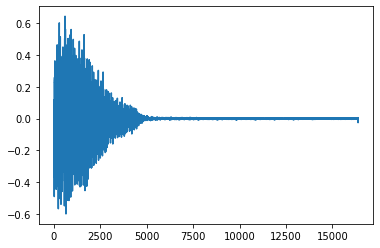

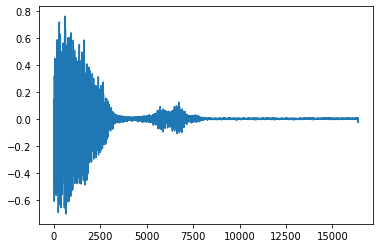

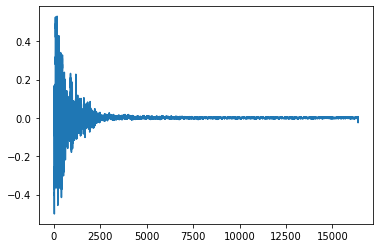

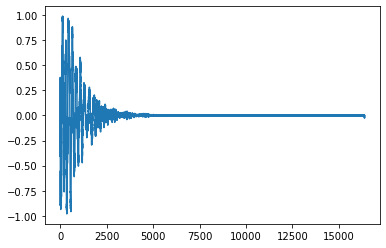

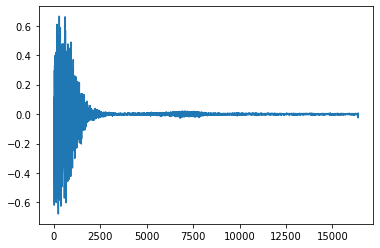

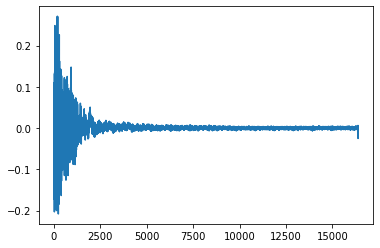

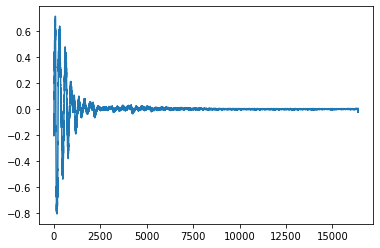

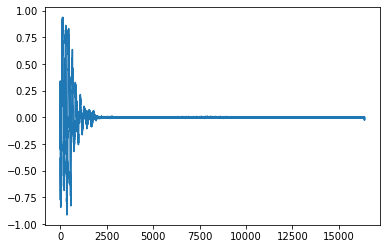

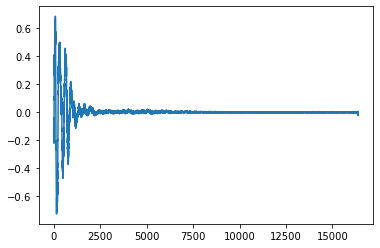

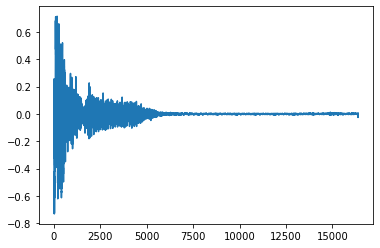

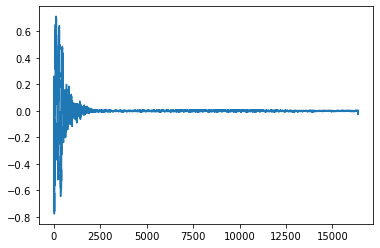

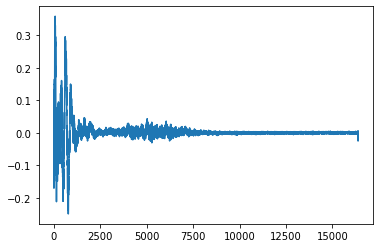

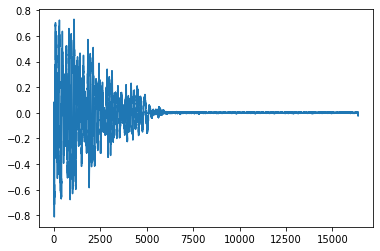

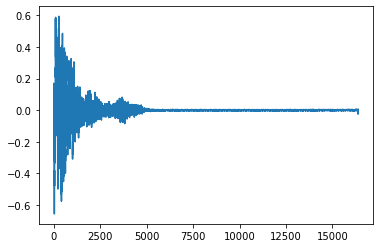

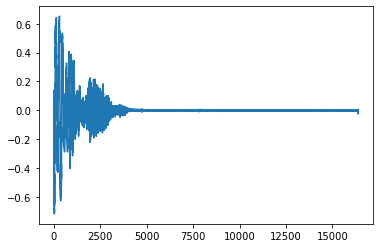

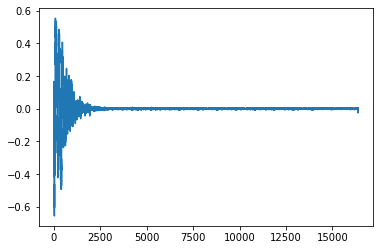

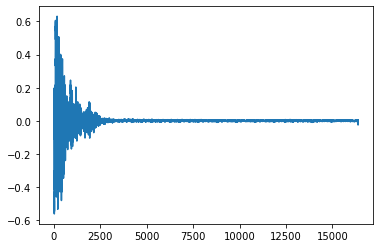

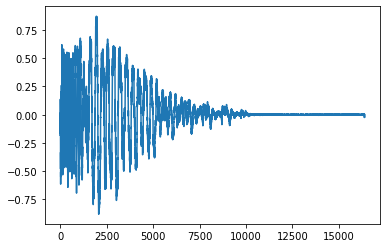

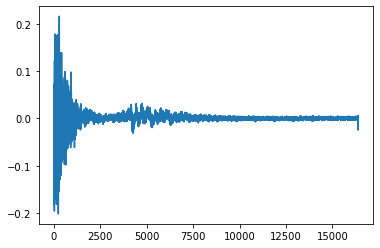

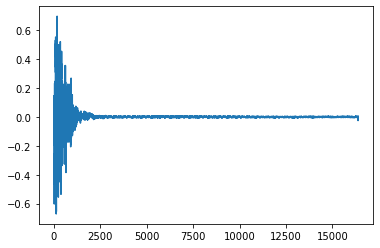

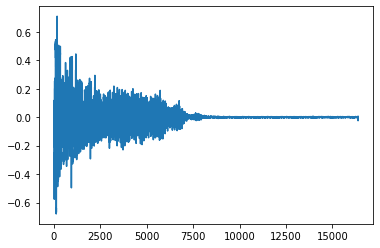

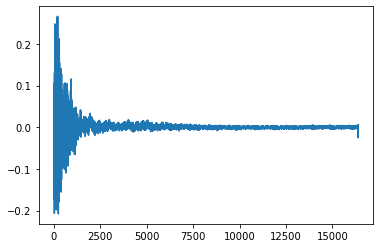

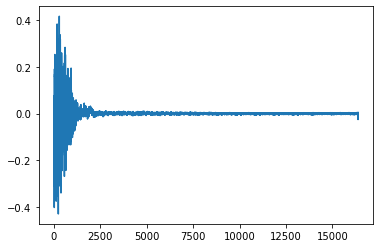

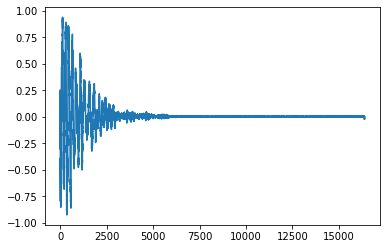

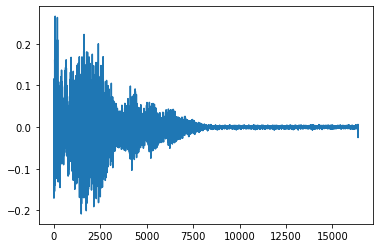

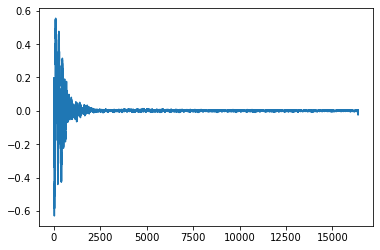

In [63]:
import matplotlib.pyplot as plt

for audio in audio_batch:
    plt.plot(audio[0])
    plt.show()